# **NIP Data and Computation Research Group Technical Exam**

_Instructions_:  

For this technical exam, you will be asked to develop this Jupyter/Google Colab notebook by writing Python code to analyze the provided datasets (CSV files). For data preparation and analysis, use the Python library *pandas* and *numpy* and for plotting, use the library *matplotlib*. You may, of course, use other libraries in addition.

Answer each part of the exam as completely as you can. **Discuss all your code and results as clearly and concisely as possible.**

All relevant files and the submission folder are in this Google Drive: https://drive.google.com/drive/folders/12M4d2S9BHOFhwcBVZuicp3oSufMIuD4u


### Student Information

_Full Name (Last Name, First Name)_: Danac, Nathan Gabriel\
_Year and Program_: II - BS Applied Physics\
_Student No._: 2021 - 12517

## Part 0. Data ingest
In the folder "Data", there is a subfolder "CSV" containing 3 CSV files.

First, you need to make a copy of these files and save it to a folder in your own Google Drive.

The code cells below will (1) mount your Google Drive and (2) load these CSV files from your Google Drive folder.

When you run the cell below, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

 1CF6C7D4-8572-477F-A9FC-011622283AAA.jpeg
 202112517.jpg
 406EF345-02D5-4C31-9918-38B9A941F362.jpeg
 63E62B20-2594-4300-9873-74CEC37ED2EF.jpeg
 92A266EA-248D-479F-9766-FB6AED86D6C0.jpeg
'AY 2021-2022'
'AY 2022-2023'
 Books
 CA3D50A2-7F36-4C8B-B098-17565C15242A.jpeg
 Classroom
'Colab Notebooks'
'Copy of Physics_108_Academic_Integrity_Statement_2023.docx'
'Copy of Physics_108_Academic_Integrity_Statement_2023.gdoc'
'DANAC_1_Pendular behavior of public transport networks.pdf'
'DANAC_1_Rumor Propagation is Amplified by Echo Chambers in Social Media.pdf'
'DANAC_2_Pendular behavior of public transport networks.pdf'
'DANAC_2_Rumor Propagation is Amplified by.pdf'
'DANAC - 2x2.png'
'DANAC_3_Revealing time’s secrets at the National Theatre of Costa Rica via innovative software for cultural heritage research (1).pdf'
'DANAC_3_Revealing time’s secrets at the National Theatre of Costa Rica via innovative software for cultural heritage research.pdf'
 DANAC_AIS.pdf
'DANAC - CRS (1).pdf'
'DANAC - CR

Define the directory path to the location of the file, i.e. if it is in a
folder named "Exam" under My Drive, then the file path will be "/content/drive/My Drive/Exam". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AY 2022-2023/2nd Semester/D&C/"

Now, we can load the files into pandas dataframes using $\tt pandas$' read_csv function below.


In [ ]:
import numpy as np
import pandas as pd

df1 = pd.read_csv(file_path + 'paper_df.csv')
df2 = pd.read_csv(file_path + 'author_df.csv')
df3 = pd.read_csv(file_path + 'affiliation_df.csv')

Print out the first couple of rows.

In [ ]:
df1.head()

,eid,pub_type,sub_type,year_pub,citation_count,title,published_in,doi,subj_area,subj_area_abbrev,abstract
0,2-s2.0-0000006792,Journal,Article,1998,54,Analysis of Invertebrate Biodiversity in a Phi...,Environmental Entomology,10.1093/ee/27.5.1125,"Ecology, Evolution, Behavior and Systematics, ...","AGRI, ENVI, AGRI","Rank-abundance curves, indices of community st..."
1,2-s2.0-0000021077,Journal,Article,1985,36,Genetics of resistance of rice cultivar ARC105...,Journal of Genetics,10.1007/BF02931140,Genetics,BIOC,Resistance to brown planthopper in rice cultiv...
2,2-s2.0-0000021188,Journal,Article,1970,16,Effects of different methods of zinc applicati...,Soil Science and Plant Nutrition,10.1080/00380768.1970.10432832,"Soil Science, Plant Science","AGRI, AGRI",A disorder of the rice plant has been known to...
3,2-s2.0-0000024413,Journal,Article,1993,52,Effect of light on incompatible interactions b...,Physiological and Molecular Plant Pathology,10.1006/pmpp.1993.1031,"Genetics, Plant Science","BIOC, AGRI",When leaves of rice (Oryza sativa L.) cultivar...
4,2-s2.0-0000032820,Journal,Article,1987,29,Composition of Azospirillum species associated...,Plant and Soil,10.1007/BF02370912,"Soil Science, Plant Science","AGRI, AGRI",Total aerobic heterotrophs and N2-fixing putat...


In [ ]:
df2.head()

,author_name,affiliation_id,author_id,eid
0,Kenneth G. Schoenly,60031195,6601999129,2-s2.0-0000006792
1,Hilario D. Justo Jr.,60071480,6506762885,2-s2.0-0000006792
2,Alberto T. Barrion,60031195,6603697171,2-s2.0-0000006792
3,Marvin K. Harris,60020547,7404204930,2-s2.0-0000006792
4,Dale G. Bottrell,60020304,6602589146,2-s2.0-0000006792


In [ ]:
df3.head()

,affiliation_id,affiliation_name,affiliation_country,affiliation_city
0,100241956,Division of Cardiology,Switzerland,Geneva
1,100242046,Department of Biology,United States,Chapel Hill
2,100242133,Department of Economics,United States,Chapel Hill
3,100242991,Department of Atmospheric Science,United States,Urbana
4,100242998,Department of Crop Sciences,United States,Urbana


## Part 1. Create a visualization that shows the growth in PH publication productivity over time. What metric(s) did you choose to plot and why? What insights can you glean from the chart(s)?

Import useful libraries,

In [ ]:
import matplotlib.pyplot as plt

Merging all three data sets,


In [ ]:
df4 = pd.merge(df2, df3, on="affiliation_id")
df = pd.merge(df1, df4, on="eid")

print(df.head(5))

                 eid pub_type sub_type  year_pub  citation_count  \
0  2-s2.0-0000006792  Journal  Article      1998              54   
1  2-s2.0-0000006792  Journal  Article      1998              54   
2  2-s2.0-0000006792  Journal  Article      1998              54   
3  2-s2.0-0000006792  Journal  Article      1998              54   
4  2-s2.0-0000006792  Journal  Article      1998              54   

                                               title  \
0  Analysis of Invertebrate Biodiversity in a Phi...   
1  Analysis of Invertebrate Biodiversity in a Phi...   
2  Analysis of Invertebrate Biodiversity in a Phi...   
3  Analysis of Invertebrate Biodiversity in a Phi...   
4  Analysis of Invertebrate Biodiversity in a Phi...   

               published_in                   doi  \
0  Environmental Entomology  10.1093/ee/27.5.1125   
1  Environmental Entomology  10.1093/ee/27.5.1125   
2  Environmental Entomology  10.1093/ee/27.5.1125   
3  Environmental Entomology  10.1093/ee/27

We end up with a dataset containing an entry for each unique paper and each unique author. I will just take careful note of this later to avoid duplicates.

Filtering the data set to the Philippines only,

In [ ]:
ph_df = df[(df.affiliation_country=="Philippines")]

print(ph_df)

                      eid pub_type sub_type  year_pub  citation_count  \
0       2-s2.0-0000006792  Journal  Article      1998              54   
1       2-s2.0-0000006792  Journal  Article      1998              54   
2       2-s2.0-0000006792  Journal  Article      1998              54   
5       2-s2.0-0000021077  Journal  Article      1985              36   
6       2-s2.0-0000021077  Journal  Article      1985              36   
...                   ...      ...      ...       ...             ...   
397859  2-s2.0-9944261384  Journal  Article      2004               5   
397860  2-s2.0-9944261384  Journal  Article      2004               5   
397861  2-s2.0-9944261384  Journal  Article      2004               5   
397862  2-s2.0-9944261384  Journal  Article      2004               5   
397863  2-s2.0-9944261384  Journal  Article      2004               5   

                                                    title  \
0       Analysis of Invertebrate Biodiversity in a Phi...   
1

Plotting the most basic metric, number of publications per year

year_pub
1960      13
1961       8
1962      18
1963       9
1964      22
        ... 
2017    3397
2018    3638
2019    5122
2020    4132
2021      82
Name: eid, Length: 62, dtype: int64


<Axes: title={'center': 'Publications per year'}, xlabel='Year', ylabel='Publications'>

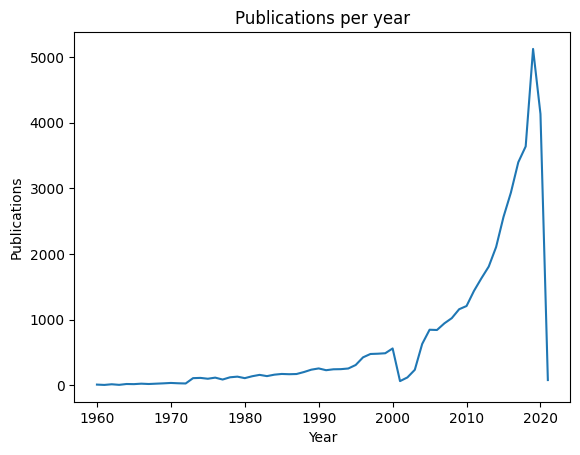

In [ ]:
ycount = ph_df.drop_duplicates(subset="eid").groupby("year_pub").count()["eid"] #include only unique publications

print(ycount)

ycount.plot(xlabel="Year", ylabel="Publications", title="Publications per year")


We can also plot the cumulative publications per year

year_pub
1960       13
1961       21
1962       39
1963       48
1964       70
        ...  
2017    29741
2018    33379
2019    38501
2020    42633
2021    42715
Name: eid, Length: 62, dtype: int64


<Axes: title={'center': 'Cumulative publications per year'}, xlabel='Year', ylabel='Publications'>

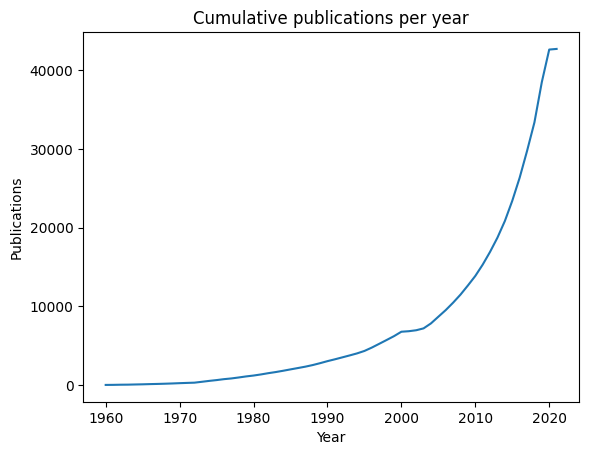

In [ ]:
ysum = ycount.cumsum()

print(ysum)

ysum.plot(xlabel="Year", ylabel="Publications", title="Cumulative publications per year")

If we consider the metrics above as a measure of the Philippines's research productivity, we can see a steady increase over the years, with a particular drop around the year 2000. The drop-off from 2020 to 2021 is likely due to the data set being collected in the middle of 2021, hence there are only few publications included for the year.

The next question I want to ask is are we developing new scientists?

year_pub
1960       18
1961       17
1962       24
1963       14
1964       39
        ...  
2017     9165
2018     9419
2019    14586
2020    11105
2021      181
Name: author_id, Length: 62, dtype: int64


<Axes: title={'center': 'Authors per year'}, xlabel='Year', ylabel='Authors'>

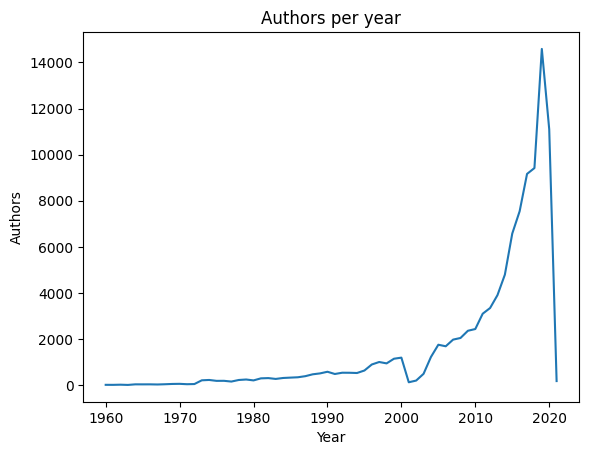

In [ ]:
acount = ph_df.drop_duplicates(subset=["author_id", "eid"]).groupby("year_pub").count()["author_id"] #include only unique authors

print(acount)

acount.plot(xlabel="Year", ylabel="Authors", title="Authors per year")

year_pub
1960        18
1961        35
1962        59
1963        73
1964       112
         ...  
2017     66711
2018     76130
2019     90716
2020    101821
2021    102002
Name: author_id, Length: 62, dtype: int64


<Axes: title={'center': 'Cumulative count of unique authors'}, xlabel='Year', ylabel='Authors'>

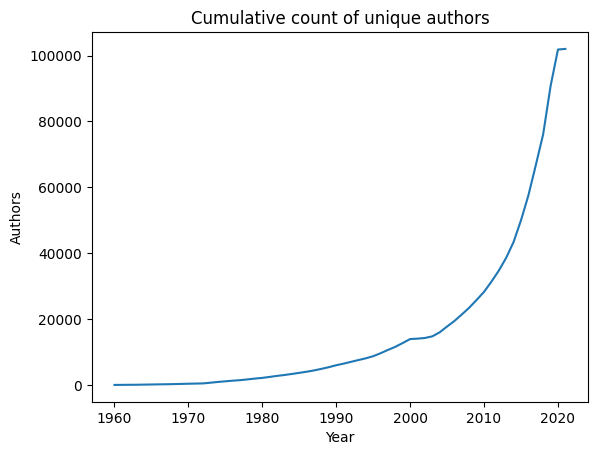

In [ ]:
asum = acount.cumsum() #include only unique authors

print(asum)

asum.plot(xlabel="Year", ylabel="Authors", title="Cumulative count of unique authors")

Similar trends can be observed in the figures above to the number of publications. This implies that the increase in research output is due to a growing number of scientists getting their works published. This is a good sign.

Another plausible metric for productivity is the citation count, which may help us determine whether our research output is finding any value after publication.

year_pub
2012    32775
2013    30817
2014    30316
2015    40144
2016    43226
2017    37769
2018    28451
2019    15644
2020     5199
2021       64
Name: citation_count, dtype: int64


<Axes: title={'center': 'Citations per year'}, xlabel='Year', ylabel='Citations'>

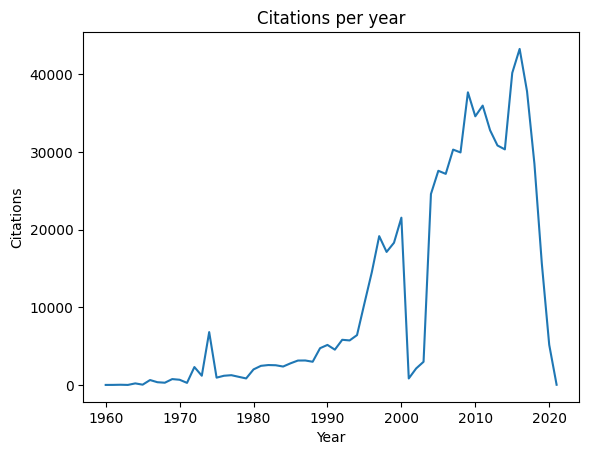

In [ ]:
ccount = ph_df.drop_duplicates(subset=["eid"]).groupby("year_pub")["citation_count"].sum() #include only unique papers

print(ccount.tail(10))

ccount.plot(xlabel="Year", ylabel="Citations", title="Citations per year")

year_pub
1960        44
1961        92
1962       159
1963       203
1964       444
         ...  
2017    646437
2018    674888
2019    690532
2020    695731
2021    695795
Name: citation_count, Length: 62, dtype: int64


<Axes: title={'center': 'Cumulative citations per year'}, xlabel='Year', ylabel='Citations'>

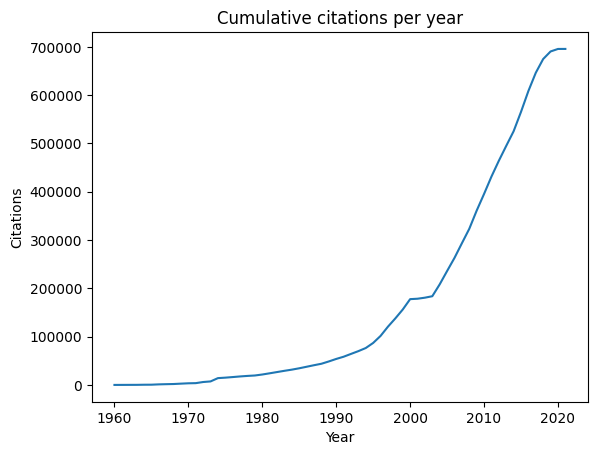

In [ ]:
csum = ccount.cumsum() #include only unique papers

print(csum)
o
csum.plot(xlabel="Year", ylabel="Citations", title="Cumulative citations per year")

The graph for citations per year look quite different compared to the previous two metrics. Given more time after publication, we expect older studies to have more citations. However, this is not the case. This suggests that older research was perhaps not as accessible, although the situation has improved within the past decade.

## Part 2. Define a question that you are interested to find out the answer to that you think can be answered by the data. Perform analysis to answer the question and generate tables/dataframes and visualizations to present your results. Were you able to answer the question you started out to answer? Summarize the highlights of your results (in bullet points in text cell/s).

Originally, I wanted to ask the question of whether there was any correlation between R&D expenditure as a % of GDP and our candidate metrics for research productivity. However, the data is too limited to perform a proper comparison, only being present from the years of 2002 to 2014.
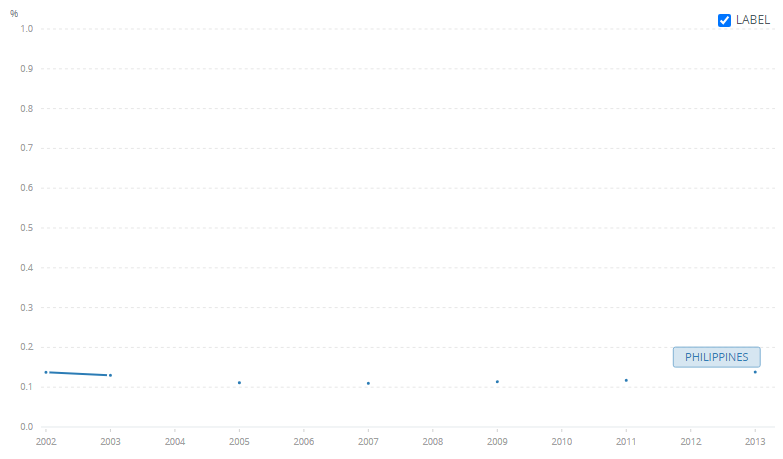

Data taken from World Bank

It shows very little variation, dropping from 0.14% in 2002 to 0.11% in 2005 and 2007, before slowly returning to 0.14% as of 2013. The data shows little correlation to the number of publications per year over the given time frame.

The only relevant and complete data sets I was able to access online were the GDP per capita of the Philippines and the Population of the Philippines. The data was retrieved from [datacommons](https://datacommons.org), an open-knowledge data platform by Google.

In [ ]:
gdp = pd.read_csv(file_path + 'gdp_capita.csv').set_index("label")
gdp.index.name = "year_pub"
pop = pd.read_csv(file_path + 'population.csv').set_index("label")
pop.index.name = "year_pub"

          GDP Per Capita
year_pub                
2021         3460.530963
2020         3224.422551
2019         3413.847924
2018         3194.674521
2017         3077.435640
...                  ...
1964          186.541259
1963          177.332395
1962          164.133463
1961          278.476991
1960          263.836862

[62 rows x 1 columns]


<Axes: xlabel='Year', ylabel='GDP per capita (in USD)'>

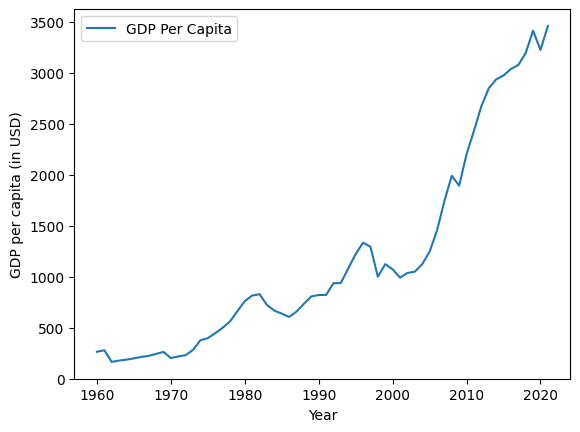

In [ ]:
print(gdp)

gdp.plot.line(xlabel="Year", ylabel="GDP per capita (in USD)")

The change in GDP per capita bears resemblance to the number of publications per year. Of particular note is the trough around the year 2000, during the Erap administration that led to the EDSA II revolution. This suggests that research output suffered as a consequence of poor economic and administrative conditions.

          Total Population
year_pub                  
2021             113880328
2020             112190977
2019             110380804
2018             108568836
2017             106738501
...                    ...
1964              31916622
1963              31043711
1962              30185979
1961              29342411
1960              28486871

[62 rows x 1 columns]


<Axes: xlabel='Year', ylabel='Population (in hundred millions)'>

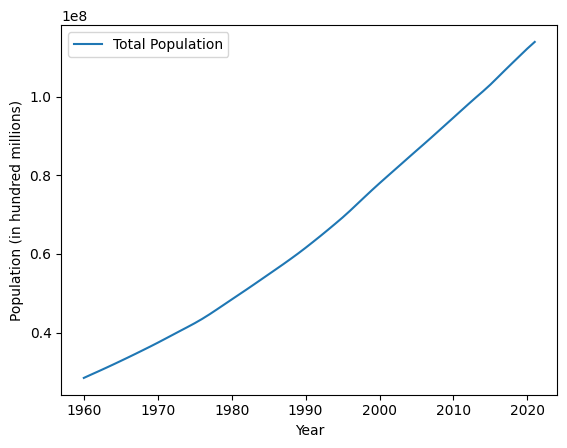

In [ ]:
print(pop)

pop.plot.line(xlabel="Year", ylabel="Population (in hundred millions)")

With this data, the question I would now like to ask is are we producing enough scientists?

year_pub
1960    6.318700e-07
1961    1.192813e-06
1962    1.954550e-06
1963    2.351523e-06
1964    3.509143e-06
            ...     
2017    6.249947e-04
2018    7.012141e-04
2019    8.218458e-04
2020    9.075685e-04
2021    8.956946e-04
Length: 62, dtype: float64


<Axes: title={'center': 'Are we producing enough scientists?'}, xlabel='Year', ylabel='Ratio of scientists to population'>

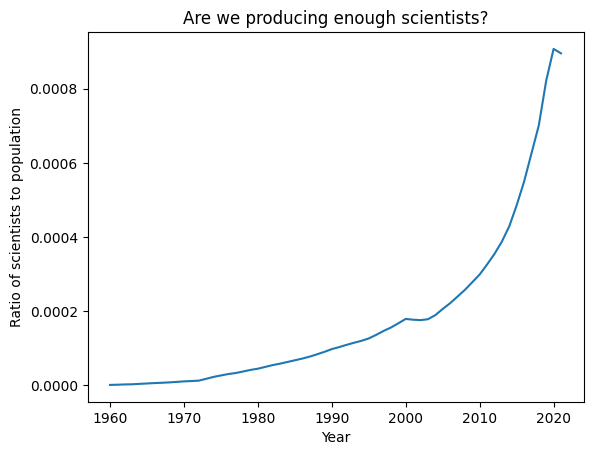

In [ ]:
cp = asum/pop["Total Population"]

print(cp)
cp.plot(xlabel="Year", ylabel="Ratio of scientists to population", title="Are we producing enough scientists?")

To answer this question, I decided to estimate the number of scientists in the Philippines using the cumulative count of unique published authors and compared it with the population of the Philippines.

The good news is we have been increasing that ratio over the past decades. However, it is still far from enough. To date, scientists comprise less than 0.1% of the population. For context, that means as scientists, there are at least a thousand Filipinos relying on each of us. We still need more scientists.

There are a total of 3547 unique institutions that have published a research article between 1960 and 2021.
The top 10 affiliations accounted for 26678.0 out of 42715 or 62.455811775722815% of publications from 1960 to 2021.


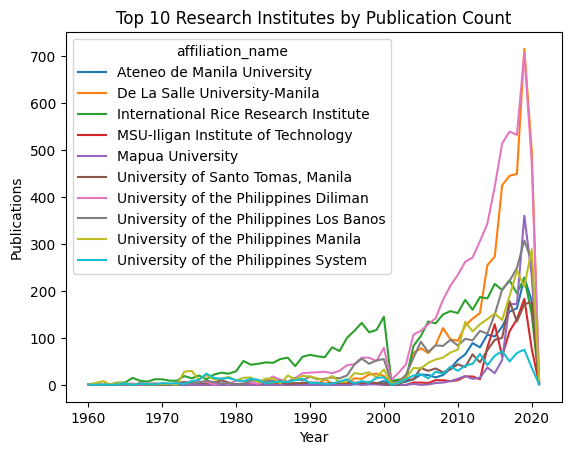

In [ ]:
uni = ph_df.drop_duplicates(subset="eid").groupby(["year_pub", "affiliation_name"])["affiliation_id"].count().unstack("affiliation_name").fillna(0)
uni500 = uni[uni.columns[uni.sum()>900]]

unis = uni500.sum().sum()
ys = ycount.sum()
us = ph_df.drop_duplicates(subset="affiliation_name")["affiliation_name"].value_counts().sum()

print("There are a total of " + str(us) + " unique institutions that have published a research article between 1960 and 2021.")

uni500.plot(xlabel="Year", ylabel="Publications", title="Top 10 Research Institutes by Publication Count")

print("The top 10 affiliations accounted for " + str(unis) + " out of " + str(ys) + " or " + str(100*(unis/ys)) + "% of publications from 1960 to 2021.")

I also chose to plot the publications per year of the top 10 affiliations by publication count. The list is dominated by the University of the Philippines, accounting for most of the publications throughout the time frame. Similarly prominent is De La Salle University, which is also known as one of the top research universities in the country.

While these results are unsurprising, it still remains concerning that the top 10 out of 3,547 research institutes across the country account for a whopping 62% of the publications in the last 60 years. This exhibits that there is a large disparity between universities' resources and consequently, capacities to conduct research. This poses a large problem, as science and education should be accessible to everyone.

## Part 3. Define anoter question that you are interested to find out the answer to that you think can be answered by the data. Follow same instructions as in Part 2.

Returning to the GDP per capita data,

          GDP Per Capita
year_pub                
2021         3460.530963
2020         3224.422551
2019         3413.847924
2018         3194.674521
2017         3077.435640
...                  ...
1964          186.541259
1963          177.332395
1962          164.133463
1961          278.476991
1960          263.836862

[62 rows x 1 columns]


<Axes: xlabel='Year', ylabel='GDP per capita (in USD)'>

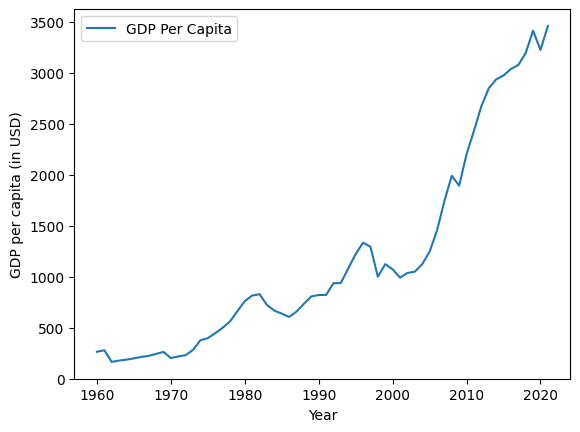

In [ ]:
print(gdp)

gdp.plot.line(xlabel="Year", ylabel="GDP per capita (in USD)")

Comparing the GDP per capita to the proposed metrics for research productivity, we can see similar trends again. However, the next question to answer is if research results in a stronger economy, or vice versa.

To better answer this question, I decided to look for more data. I was able to find a data set on the share of agricultural sector in GDP from the World Bank.

          GDP %
Year           
1960  23.708189
1961  23.645382
1962  23.805024
1963  24.404562
1964  23.759728
...         ...
2017  10.182954
2018   9.650140
2019   8.820324
2020  10.185311
2021  10.068457

[62 rows x 1 columns]


<Axes: title={'center': 'Share of agricultural sector in GDP'}, xlabel='Year', ylabel='% of GDP'>

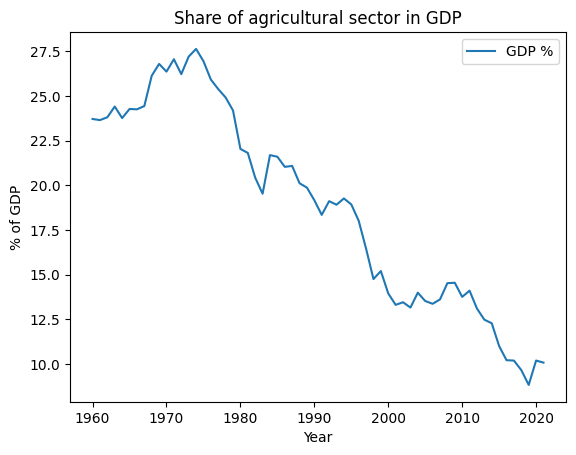

In [ ]:
agri = pd.read_csv(file_path + "agri.csv").set_index("Year")

print(agri)

agri.plot(xlabel="Year", ylabel="% of GDP", title="Share of agricultural sector in GDP")

Interestingly, it has been on a steady decline, despite the Philippines' identity as an agricultural nation. This can be attributed to the growth of the services industry over time, which has eaten into agriculture's share in the economy.

For comparison, I chose to plot the number of agriculture-related publications per year from the data set.

year_pub
1960      1
1961      1
1962      1
1963      1
1964      2
       ... 
2017    675
2018    654
2019    674
2020    598
2021     18
Name: eid, Length: 62, dtype: int64


<Axes: title={'center': 'Agriculture-related research in the Philippines'}, xlabel='Year', ylabel='Publications'>

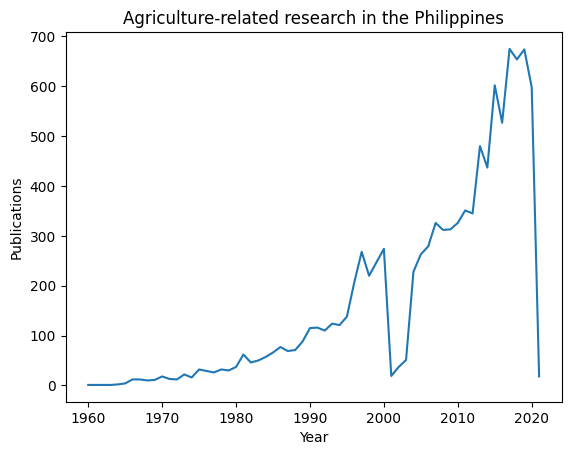

In [ ]:
agripub = ph_df[ph_df["subj_area_abbrev"].str.contains("AGRI")==True].drop_duplicates(subset="eid").groupby("year_pub").count()["eid"]
print(agripub)
agripub.plot(xlabel="Year", ylabel="Publications", title="Agriculture-related research in the Philippines")

Interestingly, the figure bears strong similarities to the citations per year graph. This suggests that much of the citations are coming from agriculture-related publications. This can be attributed to the prestige of the International Rice Research Institute, other univerisities, and Filipino researchers in the field of agricultural research.

On the other hand, the lack of relation with the share of agriculture in GDP suggests that the research does not necessarily translate into improvements the growth and development of our agricultural sector. Hence, there is still a disconnect between the science and the industry. This is a problem that needs to be addressed for the development of our nation.

# Reflections

I found it frustrating how there was very little historical data to work with that wasn't hidden behind paywalls. Nonetheless, the conduct of this exam still proved eye-opening for me, as I learned about the dire situation of science, research, and academe in our country. I hope to be part of the solution some day.